## The question: 
- Can we predict the confidence score of a transcription based on the word count?

## Why do we care?
- Noticed that while skimming some parts of our data, lower confidence scores were associated with transcripts with a lower word count and higher confidence scores were associated with a higher word count.
- We want to make sure our transcription results are reliable as possible, so transcripts with a lower confidence score are bothersome.
- Despite that Google's Speech Recognition is the best out there (Google SR WER = 9%, beating Microsoft Speech 18% and Sphinx's horrible 37%) we want to know about its limitations.

## Procedure

- We have roughly ~2200 samples of transcript data, with word count : conf score.
- We use the first 1000 results as training data, and the next 1000 as testing data.
- Random Forest regression was used to solve the problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading csv data in as dataframe.

In [2]:
data = pd.read_csv("..\\..\\data\\wc-cs.csv")
data.head()

,WordCount,ConfScore
0,214,0.974886
1,23,0.876633
2,122,0.956187
3,138,0.950286
4,91,0.942851


Quick Stats

In [11]:
X = data['WordCount'].iloc[0:1600].values.reshape(-1, 1)
y = data['ConfScore'].iloc[0:1600]

x_test = data['WordCount'].iloc[1600:2000].values.reshape(-1, 1)

print("X mean: " + str(X.mean()))

X mean: 87.818125


Plotting data as is

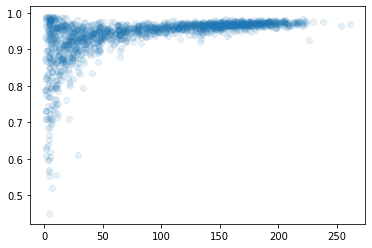

In [12]:

plt.plot(X, y, 'o', alpha=0.10)

Random forest regression model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0, 250, 0.75, 1.0]

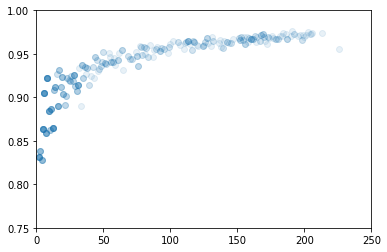

In [13]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
X_fit = np.linspace(0, 275, 250)[:, np.newaxis]
y_fit = model.predict(x_test)

plt.plot(x_test, y_fit, 'o', alpha=0.10);
plt.axis([0, 250, 0.75, 1.0])
